In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('California housing data.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,INLAND
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,INLAND
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,INLAND
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,INLAND


In [3]:
#EDA Process

df.shape

(20640, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null int64
total_rooms           20640 non-null int64
total_bedrooms        20433 non-null float64
population            20640 non-null int64
households            20640 non-null int64
median_income         20640 non-null float64
median_house_value    20640 non-null int64
ocean_proximity       20640 non-null object
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [5]:
df.keys()

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [6]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [7]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


In [8]:
df.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,INLAND
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,INLAND
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,INLAND
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,INLAND
20639,-121.24,39.37,16,2785,616.0,1387,530,2.3886,89400,INLAND


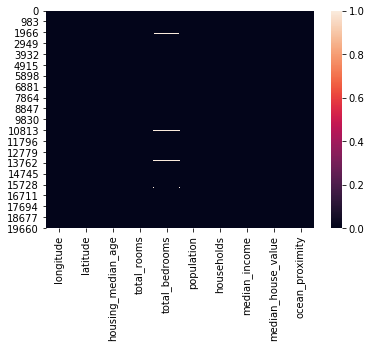

In [9]:
sns.heatmap(df.isnull())
plt.show()

In [10]:
#the null value with median
for column in ['total_bedrooms']:
    df[column].fillna(df[column].median(), inplace=True)

In [11]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [12]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age      int64
total_rooms             int64
total_bedrooms        float64
population              int64
households              int64
median_income         float64
median_house_value      int64
ocean_proximity        object
dtype: object

In [13]:
# checking the unique value
df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [14]:
#the ocean_proximity column to Numeric(boolean) Format using label encoder
import sklearn
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [15]:
#For all those columns who has 5 attributes
from sklearn import preprocessing
for cols in df.columns:
    if(len(df[cols].value_counts()) ==5):             #Unique values
        le_anima = preprocessing.LabelEncoder()
        df[cols] = le_anima.fit_transform(df[cols])

df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,3
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,3
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,3
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,3
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,3
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,1
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,1
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,1
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,1


In [16]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age      int64
total_rooms             int64
total_bedrooms        float64
population              int64
households              int64
median_income         float64
median_house_value      int64
ocean_proximity         int32
dtype: object

In [17]:
df = pd.DataFrame(data=df)
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,3
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,3
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,3
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,3
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,3
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,1
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,1
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,1
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,1


In [18]:
#finding the corelation and diagonal value from top to bottom is same
dfcor=df.corr()
dfcor

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069120,0.099773,0.055310,-0.015176,-0.045967,-0.289779
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066484,-0.108785,-0.071035,-0.079809,-0.144160,0.200974
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.319026,-0.296244,-0.302916,-0.119034,0.105623,0.112468
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.927058,0.857126,0.918484,0.198050,0.134153,-0.015693
total_bedrooms,0.069120,-0.066484,-0.319026,0.927058,1.000000,0.873535,0.974366,-0.007617,0.049457,-0.014631
population,0.099773,-0.108785,-0.296244,0.857126,0.873535,1.000000,0.907222,0.004834,-0.024650,-0.070282
households,0.055310,-0.071035,-0.302916,0.918484,0.974366,0.907222,1.000000,0.013033,0.065843,-0.018186
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007617,0.004834,0.013033,1.000000,0.688075,-0.014957
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049457,-0.024650,0.065843,0.688075,1.000000,0.081750
ocean_proximity,-0.289779,0.200974,0.112468,-0.015693,-0.014631,-0.070282,-0.018186,-0.014957,0.081750,1.000000


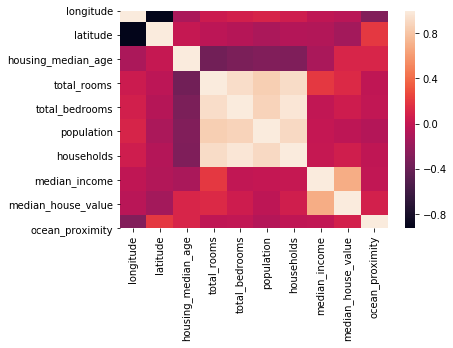

In [19]:
sns.heatmap(dfcor)

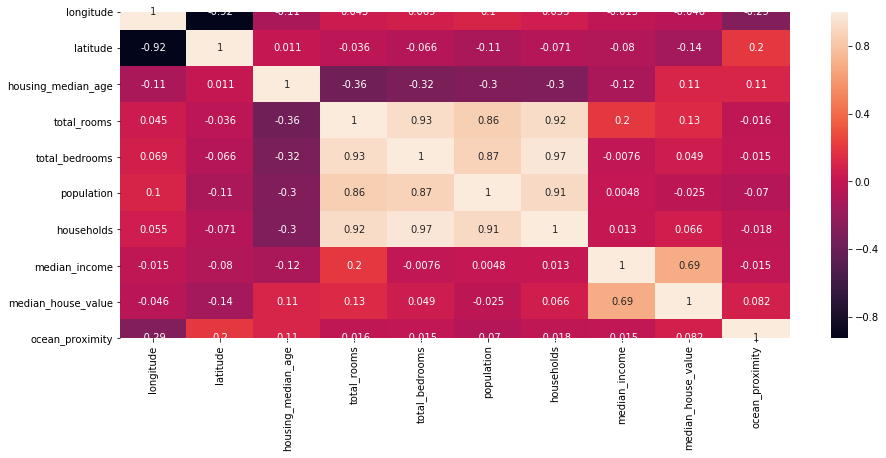

In [20]:
plt.figure(figsize=(15,6))
sns.heatmap(dfcor,color='Red',annot=True)

In [21]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,536.838857,1425.476744,499.539680,3.870671,206855.816909,1.165843
std,2.003532,2.135952,12.585558,2181.615252,419.391878,1132.462122,382.329753,1.899822,115395.615874,1.420662
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000,0.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,1.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000,1.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,4.000000


In [22]:
#finding the skewness of the dataset

df.skew()

longitude            -0.297801
latitude              0.465953
housing_median_age    0.060331
total_rooms           4.147343
total_bedrooms        3.481141
population            4.935858
households            3.410438
median_income         1.646657
median_house_value    0.977763
ocean_proximity       1.016286
dtype: float64

In [23]:
##there is some skewness which need to be treated,by seeing we can say only +ve skewness is significant and needs to be treated
#if value is 0.55 or more than that then there would be a skewed value.

#removing the skewness of the dataset using the log

for i in df.columns:
    if df.skew().loc[i]>0.55:
        df[i]=np.log1p(df[i])
    if df.skew().loc[i]<-0.55:
        df[i]=np.square(df[i])
        
df.skew()

longitude            -0.297801
latitude              0.465953
housing_median_age    0.060331
total_rooms          -0.249261
total_bedrooms       -0.052662
population           -0.237002
households           -0.125967
median_income         0.226083
median_house_value   -0.173166
ocean_proximity       0.511956
dtype: float64

In [24]:
#finding the outliers

from scipy.stats import zscore

z=abs(zscore(df))
print('df.shape:',df.shape)
df1=df.loc[(z<3).all(axis=1)]
print('df1.shape:',df1.shape)
print("z value is:",z)

df.shape: (20640, 10)
df1.shape: (20107, 10)
z value is: [[1.32783522 1.05254828 0.98214266 ... 1.99550539 1.64794879 1.33856546]
 [1.32284391 1.04318455 0.60701891 ... 1.98838047 1.23840284 1.33856546]
 [1.33282653 1.03850269 1.85618152 ... 1.65644419 1.20675137 1.33856546]
 ...
 [0.8237132  1.77823747 0.92485123 ... 1.46024238 1.14577635 0.18592909]
 [0.87362627 1.77823747 0.84539315 ... 1.29272242 1.29676041 0.18592909]
 [0.83369581 1.75014627 1.00430931 ... 0.82688611 1.20186871 0.18592909]]


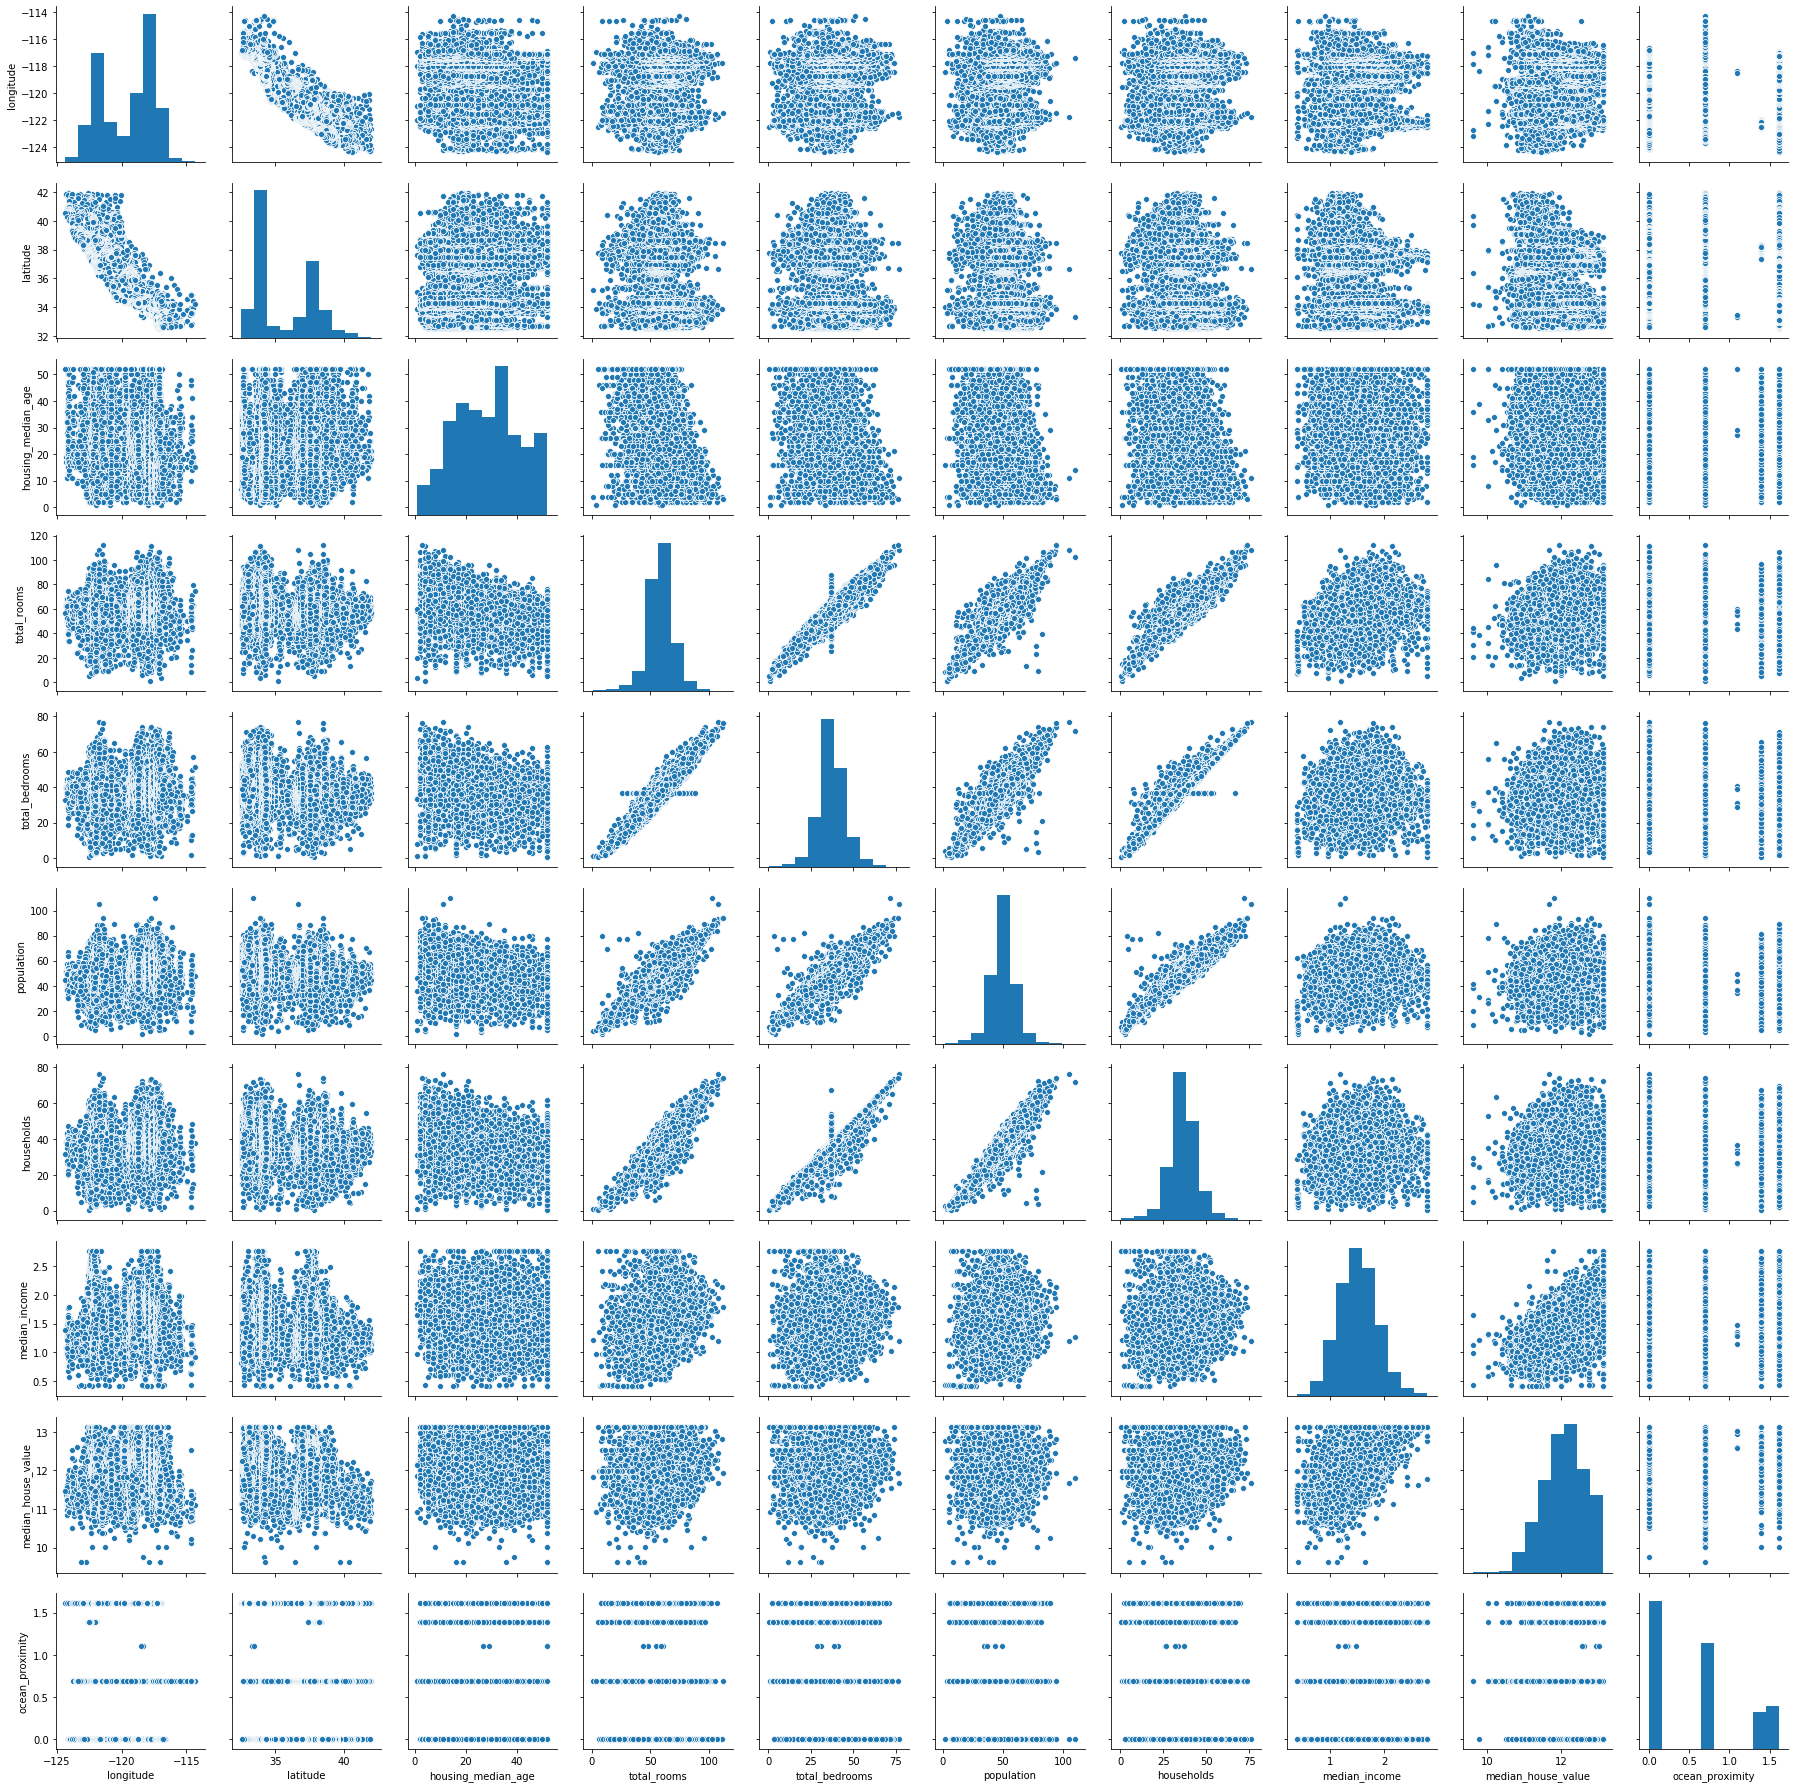

In [25]:
sns.pairplot(df)
plt.show()

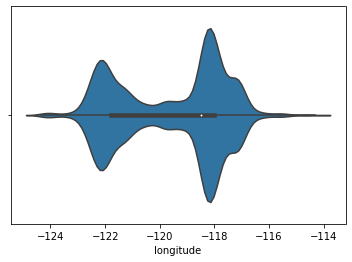

In [26]:
#violin plot representation with respect to each column

sns.violinplot(x="longitude",data=df)

In [27]:
df.keys()

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

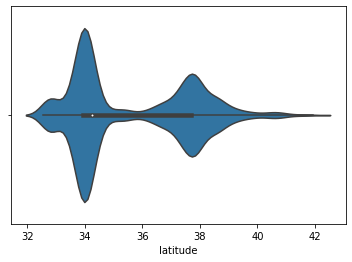

In [28]:
sns.violinplot(x="latitude",data=df)

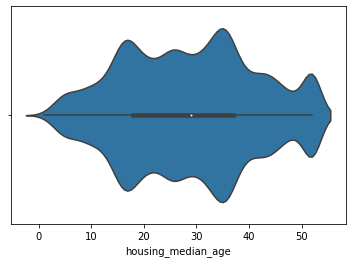

In [29]:
sns.violinplot(x="housing_median_age",data=df)

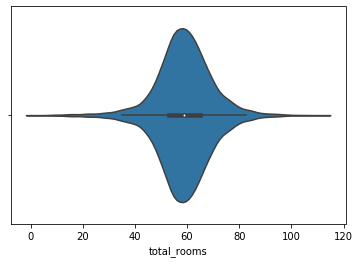

In [30]:
sns.violinplot(x="total_rooms",data=df)

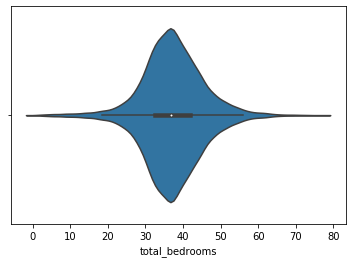

In [31]:
sns.violinplot(x="total_bedrooms",data=df)

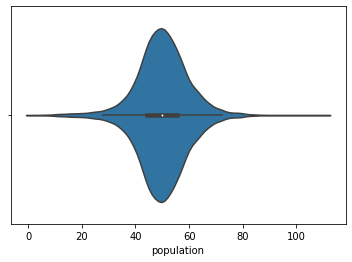

In [32]:
sns.violinplot(x="population",data=df)

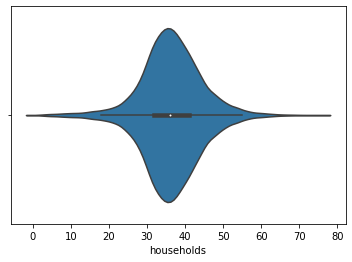

In [33]:
sns.violinplot(x="households",data=df)

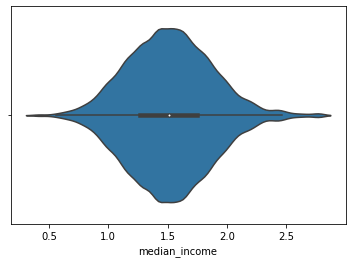

In [34]:
sns.violinplot(x="median_income",data=df)

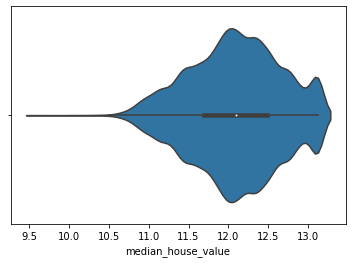

In [35]:
sns.violinplot(x="median_house_value",data=df)

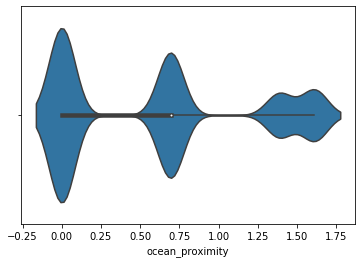

In [36]:
sns.violinplot(x="ocean_proximity",data=df)

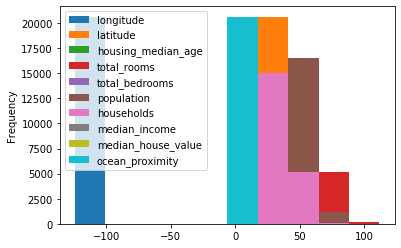

In [37]:
df.plot.hist()

In [38]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

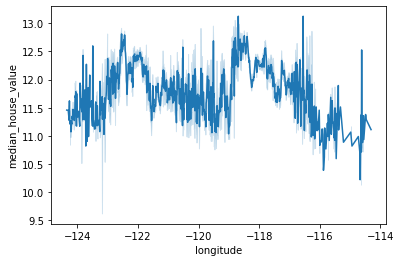

In [39]:
#lineplot representation
sns.lineplot(df["longitude"],df["median_house_value"])
plt.show()

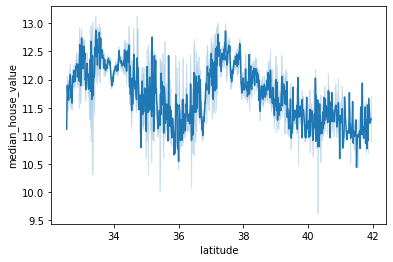

In [40]:
sns.lineplot(df["latitude"],df["median_house_value"])
plt.show()

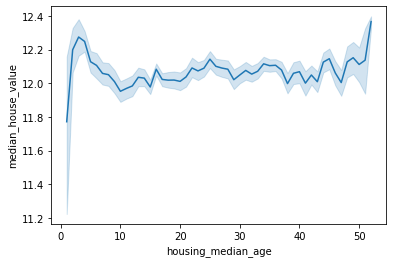

In [41]:
sns.lineplot(df["housing_median_age"],df["median_house_value"])
plt.show()

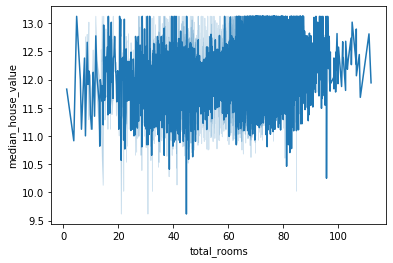

In [42]:
sns.lineplot(df["total_rooms"],df["median_house_value"])
plt.show()

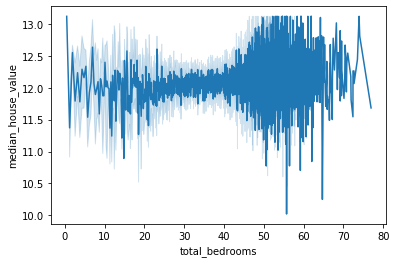

In [43]:
sns.lineplot(df["total_bedrooms"],df["median_house_value"])
plt.show()

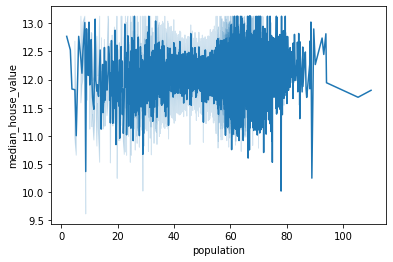

In [44]:
sns.lineplot(df["population"],df["median_house_value"])
plt.show()

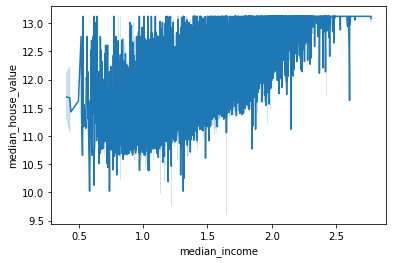

In [45]:
sns.lineplot(df["median_income"],df["median_house_value"])
plt.show()

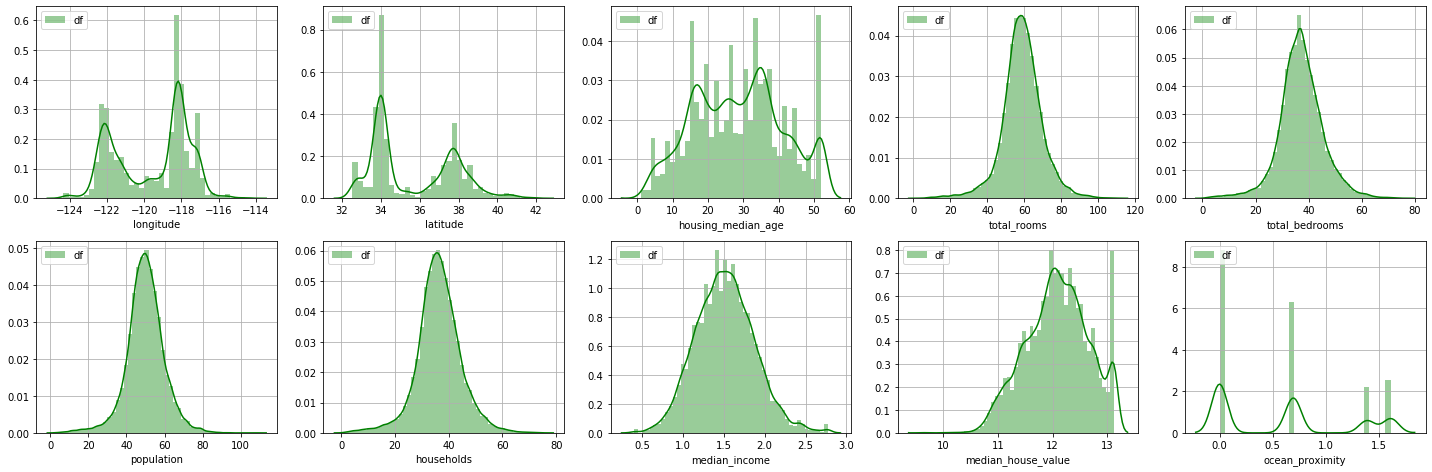

In [46]:
#displot through the iteration
plt.figure(figsize=(20,16))
for i,col in enumerate(list(df.columns.values)):
    plt.subplot(5,5,i+1)
    sns.distplot(df[col],color='g',kde=True,label='df')
    plt.grid()
    plt.legend(loc='upper left')
    plt.tight_layout()

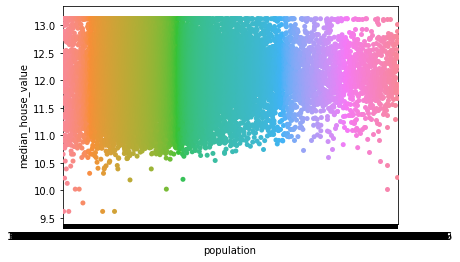

In [47]:
ax=sns.stripplot(x='population',y="median_house_value",data=df);

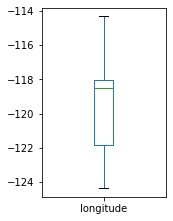

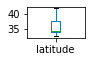

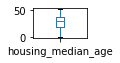

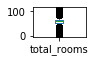

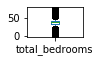

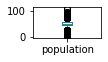

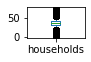

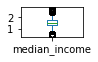

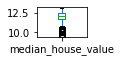

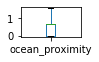

In [48]:
#boxplot

import matplotlib.pyplot as plt
plt.figure(figsize=(10,15))
for i,col in enumerate(list(df.columns.values)):
    plt.subplot(5,5,i+1)
    df.boxplot(col)
    plt.grid()
    plt.tight_layout()
    plt.show()

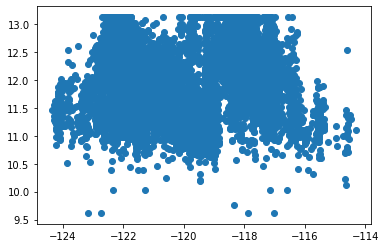

In [49]:
#Scatter plot representation
plt.scatter(df['longitude'],df['median_house_value'])

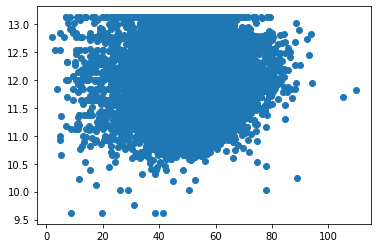

In [50]:
plt.scatter(df['population'],df['median_house_value'])

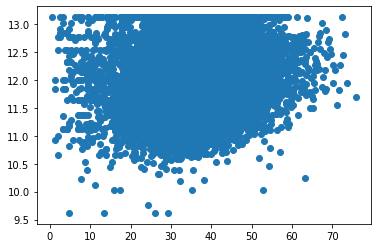

In [51]:
plt.scatter(df['households'],df['median_house_value'])

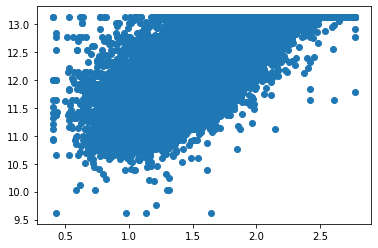

In [52]:
plt.scatter(df['median_income'],df['median_house_value'])

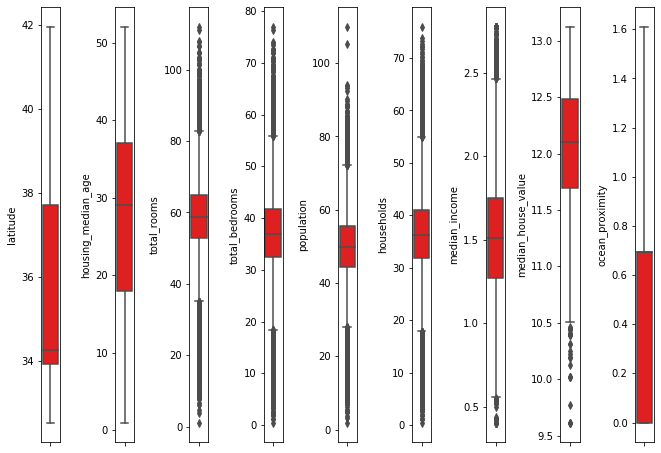

In [53]:
#column Plot
collist = df.columns.values
ncols=15
nrows=12
plt.figure(figsize=(ncols,5*ncols))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncols,i+1)
    sns.boxplot(df[collist[i]],color='red',orient='v')
    plt.tight_layout()

In [54]:
#Separating X and Y Variable to predict the dataset

X = df.drop("median_house_value", axis=1)
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41,45.982743,23.692892,33.381266,23.466149,2.232720,1.386294
1,-122.22,37.86,21,78.638765,49.131814,60.591543,49.532120,2.230165,1.386294
2,-122.24,37.85,52,53.168250,27.586376,38.546590,26.850881,2.111110,1.386294
3,-122.25,37.85,52,51.132531,29.853458,40.020167,29.091218,1.893579,1.386294
4,-122.25,37.85,52,54.687616,31.791043,40.177775,30.921180,1.578195,1.386294
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,55.029407,35.128452,45.434601,33.664578,0.940124,0.693147
20636,-121.21,39.49,18,42.879173,25.173097,34.547778,22.514381,1.268861,0.693147
20637,-121.22,39.43,17,59.612378,38.269177,47.827231,36.881870,0.993252,0.693147
20638,-121.32,39.43,18,56.683872,36.194147,43.683497,34.315381,1.053336,0.693147


In [55]:
#Scaling down using standardscaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X

array([[-1.32783522,  1.05254828,  0.98214266, ..., -1.56397746,
         1.99550539,  1.33856546],
       [-1.32284391,  1.04318455, -0.60701891, ...,  1.60146549,
         1.98838047,  1.33856546],
       [-1.33282653,  1.03850269,  1.85618152, ..., -1.1529367 ,
         1.65644419,  1.33856546],
       ...,
       [-0.8237132 ,  1.77823747, -0.92485123, ...,  0.06522329,
        -1.46024238,  0.18592909],
       [-0.87362627,  1.77823747, -0.84539315, ..., -0.24645029,
        -1.29272242,  0.18592909],
       [-0.83369581,  1.75014627, -1.00430931, ...,  0.36770139,
        -0.82688611,  0.18592909]])

In [56]:
Y = df["median_house_value"]
Y

0        13.022766
1        12.789687
2        12.771673
3        12.740520
4        12.743154
           ...    
20635    11.265758
20636    11.252872
20637    11.432810
20638    11.346883
20639    11.400887
Name: median_house_value, Length: 20640, dtype: float64

In [57]:
Y.shape

(20640,)

In [58]:
Y = Y.values.reshape(-1,1)
Y

array([[13.02276622],
       [12.78968673],
       [12.77167335],
       ...,
       [11.43281025],
       [11.34688269],
       [11.40088715]])

In [59]:
Y.shape

(20640, 1)

In [60]:
#splitting the data into training and testing

train_X,test_X,train_Y,test_Y=train_test_split(X,Y,test_size=.33,random_state=39)

In [61]:
train_X.shape

(13828, 9)

In [62]:
test_X.shape

(6812, 9)

In [63]:
train_Y.shape

(13828, 1)

In [64]:
test_Y.shape

(6812, 1)

In [65]:
#Applying Linear Regression
lg = LinearRegression()
lg.fit(train_X,train_Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [66]:
lg.coef_

array([[-0.51623476, -0.55311109,  0.05011847, -0.19978973,  0.32950882,
        -0.2900563 ,  0.17631751,  0.38462394, -0.02965169]])

In [67]:
lg.intercept_

array([12.08433221])

In [68]:
lg.score(train_X,train_Y)

0.6899647986888681

In [69]:
#predict the value
pred=lg.predict(test_X)
print("Predicted result :",pred)
print("actual price",test_Y)

Predicted result : [[11.91631811]
 [11.67909108]
 [11.70924609]
 ...
 [11.57654392]
 [12.33935037]
 [11.67318238]]
actual price [[11.93885311]
 [11.63426661]
 [12.03647579]
 ...
 [11.6852051 ]
 [12.18791377]
 [11.32419542]]


In [70]:
print('error report:')

print('Mean absolute error:',mean_absolute_error(test_Y,pred))
print('Mean sqaured error:',mean_squared_error(test_Y,pred))

print('Root mean squared error:',np.sqrt(mean_squared_error(test_Y,pred)))

error report:
Mean absolute error: 0.24110144539678408
Mean sqaured error: 0.10452519919759186
Root mean squared error: 0.3233035712725609


In [71]:
#Boost through GradientBoostRegressor By using Parameters
from sklearn import ensemble
# Fit regression model
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
modelgbr = ensemble.GradientBoostingRegressor(**params)

modelgbr.fit(train_X, train_Y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.01, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [72]:
from sklearn.metrics import mean_squared_error, r2_score
model_score = modelgbr.score(train_X,train_Y)
print("model_Score:",model_score)


y_predictedgbr = modelgbr.predict(test_X)

# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(test_Y, y_predictedgbr))
# Explained variance score: 1 is perfect prediction
print('R2 Score: %.2f' % r2_score(test_Y, y_predictedgbr))

model_Score: 0.7972154677355959
Mean squared error: 0.07
R2 Score: 0.78


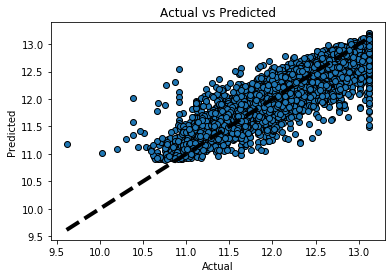

In [73]:
#Lets Visualize the Goodness of the Prediction
from sklearn.model_selection import cross_val_predict

fig, ax = plt.subplots()
ax.scatter(test_Y, y_predictedgbr, edgecolors=(0, 0, 0))
ax.plot([test_Y.min(), test_Y.max()], [test_Y.min(), test_Y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Actual vs Predicted")
plt.show()

In [74]:
#Linear Regression using Recursion
from sklearn.model_selection import train_test_split
train_X,test_X,train_Y,test_Y = train_test_split(X,Y,random_state=55,test_size=0.20)

In [75]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
def maxr2_score(regr,X,Y):
    max_r_score=0
    for r_state in range(42,100):
        train_X,test_X,train_Y,test_Y=train_test_split(X,Y,test_size=.20,random_state=r_state)
        regr.fit(train_X,train_Y)
        y_pred = regr.predict(test_X)
        r2_scr=r2_score(test_Y,y_pred)
        print("r2 score corresponding to ",r_state,"is",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("max r2 score corresponding to ",final_r_state,"is",max_r_score)
    return final_r_state

In [76]:
# Lets use LinearRegression and check the max r2 score corresponding to different state
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
r_state = maxr2_score(lreg,X,Y)

r2 score corresponding to  42 is 0.6458673572178721
r2 score corresponding to  43 is 0.6913817009445236
r2 score corresponding to  44 is 0.7031774304809231
r2 score corresponding to  45 is 0.6865947505505873
r2 score corresponding to  46 is 0.6817707079391285
r2 score corresponding to  47 is 0.6862610092979282
r2 score corresponding to  48 is 0.6902828348706529
r2 score corresponding to  49 is 0.6727003897984061
r2 score corresponding to  50 is 0.6785368892047738
r2 score corresponding to  51 is 0.6932044603892634
r2 score corresponding to  52 is 0.6868472775657859
r2 score corresponding to  53 is 0.6774112136395675
r2 score corresponding to  54 is 0.6802209155152984
r2 score corresponding to  55 is 0.6798063058772328
r2 score corresponding to  56 is 0.6664205278220178
r2 score corresponding to  57 is 0.6871759095237395
r2 score corresponding to  58 is 0.678688545805422
r2 score corresponding to  59 is 0.7013217070854807
r2 score corresponding to  60 is 0.6830342015593378
r2 score corr

In [77]:
#KNN Model
from sklearn.neighbors import KNeighborsRegressor
knr1 = KNeighborsRegressor()
knr1.fit(train_X,train_Y)
knr1.score(train_X,train_Y)
predicted=knr1.predict(test_X)
print("Mean squared error of linear svc: %.2f"% mean_squared_error(test_Y,predicted))
print('R2 Score of linear svc: %.2f' % r2_score(test_Y, predicted))

Mean squared error of linear svc: 0.08
R2 Score of linear svc: 0.75


In [78]:
#grid_search to find optimal value of n_neighbors for KNN Mode
#Lets use the Grid Search to Find the Optimal Value of n_neighbors in Knn Model
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import NearestNeighbors
neighbors={"n_neighbors":range(1,30)}
knr = KNeighborsRegressor()
gknr = GridSearchCV(knr,neighbors,cv=10)
gknr.fit(X,Y)
gknr.best_params_

{'n_neighbors': 11}

In [79]:
#Lets Use Knn Regression and Check max r2 score corresponding to different random states
knr = KNeighborsRegressor(n_neighbors=11)
r_state = maxr2_score(knr,X,Y)

r2 score corresponding to  42 is 0.7577305321294134
r2 score corresponding to  43 is 0.7739183189948667
r2 score corresponding to  44 is 0.7731066293718879
r2 score corresponding to  45 is 0.7649002286740201
r2 score corresponding to  46 is 0.7607379986896857
r2 score corresponding to  47 is 0.7633706771749798
r2 score corresponding to  48 is 0.7698599269088532
r2 score corresponding to  49 is 0.7598048788781516
r2 score corresponding to  50 is 0.7496332739802127
r2 score corresponding to  51 is 0.7592563727093011
r2 score corresponding to  52 is 0.7576967570763976
r2 score corresponding to  53 is 0.7548163566568432
r2 score corresponding to  54 is 0.7600264429908634
r2 score corresponding to  55 is 0.7566979894257875
r2 score corresponding to  56 is 0.7550483786796256
r2 score corresponding to  57 is 0.7684991141479836
r2 score corresponding to  58 is 0.7608444410113606
r2 score corresponding to  59 is 0.7646371111953272
r2 score corresponding to  60 is 0.7658021139110611
r2 score cor

In [80]:
#Lets check the mean r2 score of both linear regression model and knn regression 
from sklearn.model_selection import cross_val_score
print("Mean r2 score for Linear Regression:",cross_val_score(lreg,X,Y,cv=5,scoring="r2").mean())
print("std deviation in r2 scorefor Linear Regression:",cross_val_score(lreg,X,Y,cv=5,scoring="r2").std())
print()
print("Mean r2 score for KNN Regression: ",cross_val_score(knr,X,Y,cv=5,scoring="r2").mean())
print("std deviation in r2 score for KNN Regression:",cross_val_score(knr,X,Y,cv=5,scoring="r2").std())

Mean r2 score for Linear Regression: 0.6125190151214795
std deviation in r2 scorefor Linear Regression: 0.09498442682096554

Mean r2 score for KNN Regression:  0.5845057912541758
std deviation in r2 score for KNN Regression: 0.11148648958158767


In [81]:
#Boosting KNN
from sklearn.ensemble import AdaBoostRegressor
ada_reg2=AdaBoostRegressor()
add_reg2=AdaBoostRegressor(base_estimator=knr,learning_rate=0.1,n_estimators=10)
print("Mean r2 score for ada boosting Regression: ",cross_val_score(ada_reg2,X,Y,cv=5,scoring="r2").mean())
print("std deviation in r2 score for ada boosting Regression: ",cross_val_score(ada_reg2,X,Y,cv=5,scoring="r2").std())

Mean r2 score for ada boosting Regression:  0.4744663509159608
std deviation in r2 score for ada boosting Regression:  0.07586169487812627


In [82]:
#Boosting Linear Regression
from sklearn.ensemble import AdaBoostRegressor
ada_reg1=AdaBoostRegressor()
add_reg1=AdaBoostRegressor(base_estimator=lreg,learning_rate=0.1,n_estimators=10)
print("Mean r2 score for ada boosting Regression: ",cross_val_score(ada_reg1,X,Y,cv=5,scoring="r2").mean())
print("std deviation in r2 score for ada boosting Regression: ",cross_val_score(ada_reg1,X,Y,cv=5,scoring="r2").std())

Mean r2 score for ada boosting Regression:  0.46432197442129686
std deviation in r2 score for ada boosting Regression:  0.08105482273841215


In [83]:
#Lets check lasso regression and best value of alpha
from sklearn.linear_model import Lasso
lsreg=Lasso()
parameters={"alpha":[0.001,0.01,0.1,1]}
clf = GridSearchCV(lsreg,parameters,cv=10)
clf.fit(X,Y)
clf.best_params_

{'alpha': 0.001}

In [84]:
#Lets use cross val score with Lasso
lasso_grs=Lasso(alpha = 0.001)
print("Mean r2 score for Lasso Regression: ",cross_val_score(lasso_grs,X,Y,cv=5,scoring="r2").mean())
print("std deviation in r2 score for Lasso Regression: ",cross_val_score(lasso_grs,X,Y,cv=5,scoring="r2").std())

Mean r2 score for Lasso Regression:  0.6100270186882523
std deviation in r2 score for Lasso Regression:  0.09940429510818619


In [85]:
#Boosting Lasso Regressor
from sklearn.ensemble import AdaBoostRegressor
ada3_reg3=AdaBoostRegressor()
add3_reg3=AdaBoostRegressor(base_estimator=lasso_grs,learning_rate=0.1,n_estimators=10)
print("Mean r2 score for ada boosting Regression: ",cross_val_score(ada3_reg3,X,Y,cv=5,scoring="r2").mean())
print("std deviation in r2 score for ada boosting Regression: ",cross_val_score(ada3_reg3,X,Y,cv=5,scoring="r2").std())

Mean r2 score for ada boosting Regression:  0.47690826274270626
std deviation in r2 score for ada boosting Regression:  0.09402513521929147


In [86]:
#Support Vector Regression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

svr1 = SVR(kernel = "linear")
svr1.fit(train_X,train_Y)
svr1.score(train_X,train_Y)
y_pred1=svr1.predict(test_X)
print("Mean squared error of linear svc: %.2f"% mean_squared_error(test_Y,y_pred1))
print('R2 Score of linear svc: %.2f' % r2_score(test_Y, y_pred1))

Mean squared error of linear svc: 0.10
R2 Score of linear svc: 0.68


In [87]:
#Boosting Support Vector Machine
from sklearn.ensemble import AdaBoostRegressor
ada4_reg=AdaBoostRegressor()
add4_reg=AdaBoostRegressor(base_estimator=svr1,learning_rate=0.1,n_estimators=10)
print("Mean r2 score for ada boosting Regression: ",cross_val_score(ada4_reg,X,Y,cv=5,scoring="r2").mean())
print("std deviation in r2 score for ada boosting Regression: ",cross_val_score(ada4_reg,X,Y,cv=5,scoring="r2").std())

Mean r2 score for ada boosting Regression:  0.45678450509246044
std deviation in r2 score for ada boosting Regression:  0.0894852346803814


In [88]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rfregressor = RandomForestRegressor(n_estimators=5)
rfregressor.fit(train_X, train_Y)
y_pred5 = rfregressor.predict(test_X)
print("Mean squared error of poly svc: %.2f"% mean_squared_error(test_Y,y_pred5))
print('R2 Score : %.2f' % r2_score(test_Y, y_pred5))

Mean squared error of poly svc: 0.06
R2 Score : 0.80


In [89]:
#Boosting RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
ada_reg6=AdaBoostRegressor()
add_reg6=AdaBoostRegressor(base_estimator=rfregressor,learning_rate=0.1,n_estimators=10)
print("Mean r2 score for ada boosting Regression: ",cross_val_score(add_reg6,X,Y,cv=5,scoring="r2").mean())
print("std deviation in r2 score for ada boosting Regression: ",cross_val_score(add_reg6,X,Y,cv=5,scoring="r2").std())

Mean r2 score for ada boosting Regression:  0.6080068679490483
std deviation in r2 score for ada boosting Regression:  0.09841408209280353


In [90]:
#Decision Tree RegressorDecision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
  

dtr = DecisionTreeRegressor(random_state = 0)  
  
 
dtr.fit(X,Y) 

dtr.score(train_X,train_Y)
y_pred4=dtr.predict(test_X)
print("Mean squared error of Decision Tree Regressor: %.2f"% mean_squared_error(test_Y,y_pred4))
print('R2 Score : %.2f' % r2_score(test_Y, y_pred4))

Mean squared error of Decision Tree Regressor: 0.00
R2 Score : 1.00


In [91]:
#Decision Tree Regressor Using GridSearchCV
dtm = DecisionTreeRegressor(max_depth=4,
                           min_samples_split=5,
                           max_leaf_nodes=10)

dtm.fit(X,Y)
print("R-Squared on train dataset={}".format(dtm.score(test_X,test_Y)))

dtm.fit(test_X,test_Y)   
print("R-Squaredon test dataset={}".format(dtm.score(test_X,test_Y)))

R-Squared on train dataset=0.6197552492936463
R-Squaredon test dataset=0.6239108268589195


In [92]:
#Among all models DTR gives the Highest accuracy(1.00) and remaining all gives low score
#so we are going to save this Decision Tree Regressor as the best model.

In [94]:
# saving the predection to a csv file.
prediction = pd.DataFrame(pred, columns=['prediction']).to_csv('Project 13californiahouse.csv')

In [95]:
#Lets save the above model
from sklearn.externals import joblib

#Save the model as pickle in a file
joblib.dump(dtr,'California Housing.pkl')

['California Housing.pkl']